In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000  # Set the row limit for returned data

In [2]:
object_name = "NGC 663"
object_name = "M67"

In [3]:
obj_center = SkyCoord.from_name(object_name)

In [4]:
job = Gaia.cone_search_async(obj_center, radius=60.0*u.arcmin)  # 1 deg FOV
obj_data = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [8]:
obj_data_p = obj_data[obj_data['parallax'] > 0]
obj_table_bprp = (obj_data_p['bp_rp'] - obj_data_p['e_bp_min_rp_val'])  # adj for reddenning
obj_table_mag = obj_data_p['phot_g_mean_mag'] - obj_data_p['a_g_val'] + 5 * np.log10(obj_data_p['parallax']) - 10  # adj for extinction

In [6]:
def bv2rgb(bv):
    # https://stackoverflow.com/questions/21977786/star-b-v-color-index-to-apparent-rgb-color
    # b-v, b-r, potatos, tomatoes... but it will do for now
    if bv < -0.40: bv = -0.40
    if bv > 2.00: bv = 2.00
    r, g, b = (0.0, 0.0, 0.0)
    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        r=0.61+(0.11*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        r=0.83+(0.17*t)
    elif 0.40 <= bv<2.10:
        t=(bv-0.40)/(2.10-0.40)
        r=1.00
    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        g=0.70+(0.07*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        g=0.87+(0.11*t)
    elif 0.40 <= bv<1.60:
        t=(bv-0.40)/(1.60-0.40)
        g=0.98-(0.16*t)
    elif 1.60 <= bv<2.00:
        t=(bv-1.60)/(2.00-1.60)
        g=0.82-(0.5*t*t)
    if  -0.40 <= bv<0.40:
        t=(bv+0.40)/(0.40+0.40)
        b=1.00
    elif 0.40 <= bv<1.50:
        t=(bv-0.40)/(1.50-0.40)
        b=1.00-(0.47*t)+(0.1*t*t)
    elif 1.50 <= bv<1.94:
        t=(bv-1.50)/(1.94-1.50)
        b=0.63-(0.6*t*t)
    return (r, g, b)

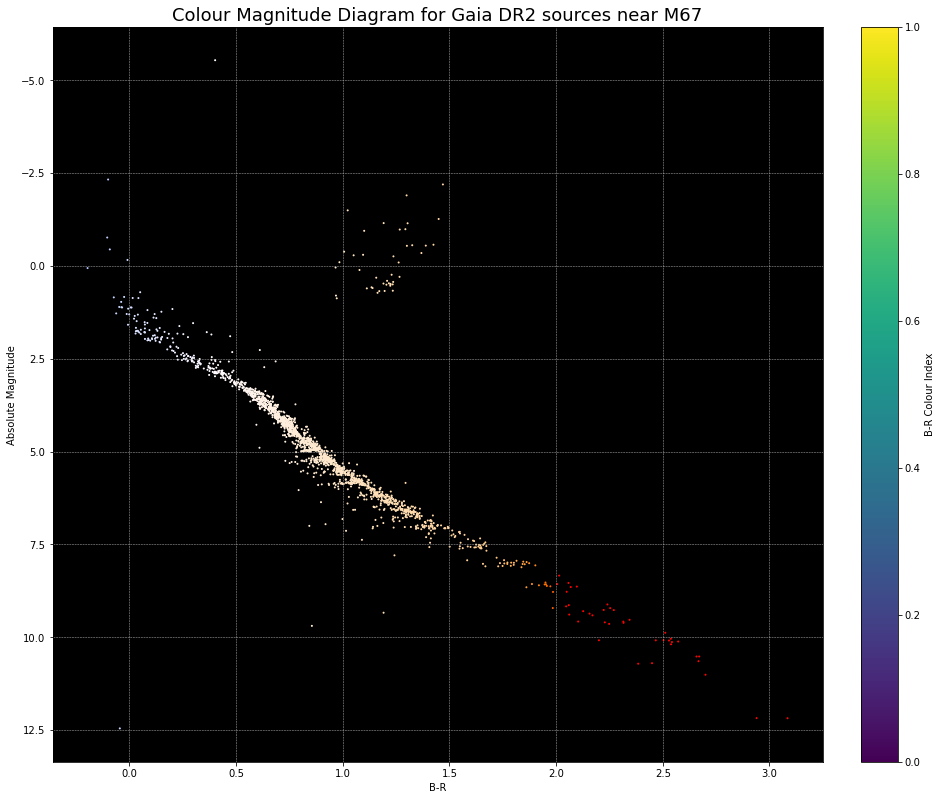

In [7]:
cols = [bv2rgb(c) for c in obj_table_bprp]
fig, ax = plt.subplots(figsize=(13, 11), constrained_layout=True)
cs = ax.scatter(obj_table_bprp, 
                obj_table_mag, 
                c=cols, s=1)
ax.invert_yaxis()
ax.set_facecolor('xkcd:black')
cb = fig.colorbar(cs)
cb.set_label(f'B-R Colour Index')

ax.set_xlabel('B-R')
ax.set_ylabel('Absolute Magnitude')

ax.set_title('Colour Magnitude Diagram for Gaia DR2 sources near '+object_name, fontsize=18)
ax.grid(linestyle='--', linewidth=0.5)